$\qquad$ $\qquad$$\qquad$  **Algorithms for machine learning and inference** <br />
$\qquad$ $\qquad$$\qquad$ **Linear and Bayesian Regression**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Arman Rahbar** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 27 April** <br />
$\qquad$ $\qquad$$\qquad$ **Submitted by: Pontus Havström, 970817-6459, ponhav@student.chalmers.se** <br />
$\qquad$ $\qquad$$\qquad$ **&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Qufei Wang, 900212-6952, qufei@student.chalmers.se**

General guidelines:
* All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. 
All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
* Your name, personal number and email address should be specified above.
* All tables and other additional information should be included in this notebook.
* ** Before submitting, make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com **

**Jupyter/IPython Notebook** is a collaborative Python web-based environment. This will be used in all our Homework Assignments. It is installed in the halls ES61-ES62, E-studio and MT9. You can also use google-colab: https://colab.research.google.com
to run these notebooks without having to download, install, or do anything on your own computer other than a browser.
Some useful resources:
1. https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/ (Quick-start guide)
2. https://www.kdnuggets.com/2016/04/top-10-ipython-nb-tutorials.html
3. http://data-blog.udacity.com/posts/2016/10/latex-primer/ (latex-primer)
4. http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html (markdown)

# [Linear Regression with regularization 11pt]

You are newly recruited as a Data Scientist at a leading consultancy company in Gothenburg. Your first task at the job is to help the Swedish Public Health Agency (folkhalsomyndigheten) for predicting the diabetes progression of patients. Assume that you are given a dataset D of $n$ patients with $D = \{ (\mathbf{x}_i, y_i)\}_{i=1}^n$ where $\mathbf{x}_i \in \mathbb{R}^p$ represents numerical features of each patients and $y_i \in \mathbb{R}$ represent the numerical diabetes progression.  One can also view the dataset D as a pair of matrices $(\mathbf{X}, \mathbf{y})$ with $\mathbf{X} \in \mathbb{R}^{n \times p}$ and $\mathbf{y} \in \mathbb{R}^{n \times 1}$.

Fresh with the lectures in the machine learning course at Chalmers, you would like to use a linear model to quickly perform the task. In order words, you would like to find a vector $\mathbf{w} \in \mathbb{R}^{p \times 1}$  such that $\mathbf{y} = \mathbf{X} \mathbf{w}$.  However,  you have just read one of the most popular machine learning book and it argues that standard linear regression (for finding $\mathbf{w}$) can lead to various problems such as non-uniqueness of the solution,  overfitting, etc. As a result, you decided to add a penalty term called regularization to control the optimisation problem. More specifically, you want to solve for: $\min_{\mathbf{w}}  \mathcal{L}(\mathbf{w})$ where  $\mathcal{L}(\mathbf{w}) = \left(\sum_{i=1}^n (y_i - \mathbf{w}^T\mathbf{x}_i)^2 \right) + \left(\alpha \sum_{j=1}^p w_j^2 \right) $ with $\alpha \in \mathbb{R}$ a small coefficient that you will decide later on.

1-  **1pt** Write down $\mathcal{L}(\mathbf{w})$ in matrix/vector forms using only $\mathbf{X}$, $\mathbf{y}$ and $\mathbf{w}$ and the L2 norm. In other words, you are not allowed to use any components $y_i, \mathbf{w}_j$ or $\mathbf{x}_i$ ( For any vector $\mathbf{z}$ use the following notation $|\mathbf{z}|_2$ to mean the L2 norm of  $\mathbf{z}$ See http://mathworld.wolfram.com/L2-Norm.html for more information about the L2 norm.)


* $\mathcal{L}(\mathbf{w}) = (\mathbf{y} - \mathbf{X}\mathbf{w})^T(\mathbf{y} - \mathbf{X}\mathbf{w}) + \alpha \mathbf{w}^T\mathbf{w} = (|\mathbf{y} - \mathbf{X}\mathbf{w}|_2)^2 + \alpha (|\mathbf{w}|_2)^2$


2- **1pt** Derive and write down in matrix/vector forms the gradient of $\mathcal{L}(\mathbf{w})$ with respect to $\mathbf{w}$. Show all the derivations. (Hint: You can start by  computing the gradient of the full expression and then convert it to matrix/vector forms. You can also directly get the gradients from your answer in 1-)


* Elements of the gradient (not in matrix form): $\frac{\partial\mathcal{L}(\mathbf{w})}{\partial w_j} =  2(\sum_{i=1}^n(y_i-\mathbf{w}^T\mathbf{x}_i))(-x_{i,j})+ 2\alpha w_j$ 
<br> $x_{i,j}$ is j-th feature of data $\mathbf{x}_i$

* Matrix form : $\dfrac{\partial\mathcal{L}(\mathbf{w})}{\partial\mathbf{w}} = -2\mathbf{X}^T(\mathbf{y - Xw}) + 2\alpha\mathbf{w}$

3- **2pt** Derive and write down in matrix/vector forms the solution $\mathbf{w}^*$ to the optimization problem $\min_{\mathbf{w}}  \mathcal{L}(\mathbf{w})$. Show all your derivations. (Hint: $\mathcal{L}(\mathbf{w})$ is convex in $\mathbf{w}$)

* Let
$$\dfrac{\partial\mathcal{L}(\mathbf{w})}{\partial\mathbf{w}} = -2\mathbf{X}^T(\mathbf{y - Xw}) + 2\alpha\mathbf{w} = 0$$
we have
\begin{equation}
\alpha\mathbf{w} = \mathbf{X^Ty} - \mathbf{X^TXw} \implies (\alpha\mathbf{I_p} + \mathbf{X^TX})\mathbf{w} = \mathbf{X^Ty} \\
\mathbf{w^*} = (\alpha\mathbf{I_p} + \mathbf{X^TX})^{-1}\mathbf{X^Ty}
\end{equation}

4-  **2pt** Under which condition on the $\alpha$ is the solution $\mathbf{w}^*$ unique? Prove rigorously your statement. Make no assumptions on $\mathbf{X}$. (Hint: If your solution $\mathbf{w}^*$ requires to invert a matrix, then one necessary condition for uniquess is for the matrix to be invertible. And any positive definitive matrix https://en.wikipedia.org/wiki/Definiteness_of_a_matrix is invertible. You might also want to look at the properties of transposition https://en.wikipedia.org/wiki/Transpose)

* As hinted by the question, in order for $\mathbf{w^*}$ to be unique, matrix ($\alpha\mathbf{I_p} + \mathbf{X^TX}$) should be invertible. We try to find the condition of $\mathbf{w^*}$ under which this is always a positive definite matrix. To do so, assume $\mathbf{z}$ be any $p$ dimension non-zero vector, we have
$$\mathbf{z^T}(\alpha\mathbf{I_p} + \mathbf{X^TX})\mathbf{z} = \alpha\mathbf{z^Tz} + \mathbf{z^TX^TXz} 
= \alpha(|\mathbf{z}|_2)^2 + (|\mathbf{Xz}|_2)^2$$
Since $(|\mathbf{z}|_2)^2 > 0$ and $(|\mathbf{Xz}|_2)^2 \ge 0$, by the definition of positive definite matrix, $\alpha$ should satisfy
$$\alpha \gt 0$$

5- **2pt** Implement in Python a well commented function **fit_linear_with_regularization** that takes as input $\mathbf{X}$, $\mathbf{y}$ and $\alpha$ and return $\mathbf{w}^*$ as computed in question 3. You are not allowed to use any loops (for-loop, while-loop ...) to do the implementation. Instead use and abuse as much as possible numpy vectorization techniques. A skeleton of the function is shown in the code cell below.

6- **3pt** Implement in Python a well commented function **predict** that takes as input a dataset $\mathbf{X_{\text{test}}}$ in the same dimensions as $\mathbf{X}$ and return the predictions.   Write down the mean squared error (https://en.wikipedia.org/wiki/Mean_squared_error) of your predictions. Then on the same plot with legends, show:

 a) A scatter plot of the first feature of $\mathbf{X_{\text{test}}}$ (x-axis) and the diabetes progression $\mathbf{y_{\text{test}}}$ 
 
 b) A plot of your prediction for $\mathbf{X_{\text{test}}}$
 
 The skeleton code in the cell below already implements most of data loading and you should only have to fill in the *TODO* part. Again here no loops are allowed (for-loop, while loop in the implementation of the plots and the **predict** )
 
 **Bonus question**
 
In the code from the cell below, we use alpha = 0.01. If you want, you could check if you can improve the mean squared error by using a different value of strictly positive alpha  and/or by normalizing the input features $\mathbf{X}$. 

Finding this improvement, will not give you any additional points. Not finding an improvement  will not prevent you from getting full points (if all questions with points are answered correctly). However, if you find an improvement, we will pick exactly one question where you didn't receive full points in this assignment and give you full points there. In particular,  between the questions for which you have reasonably attempted a solution, we will pick the one where the difference between the full point and the point you received is the maximum.







Mean Squared error is  2003.790965006092


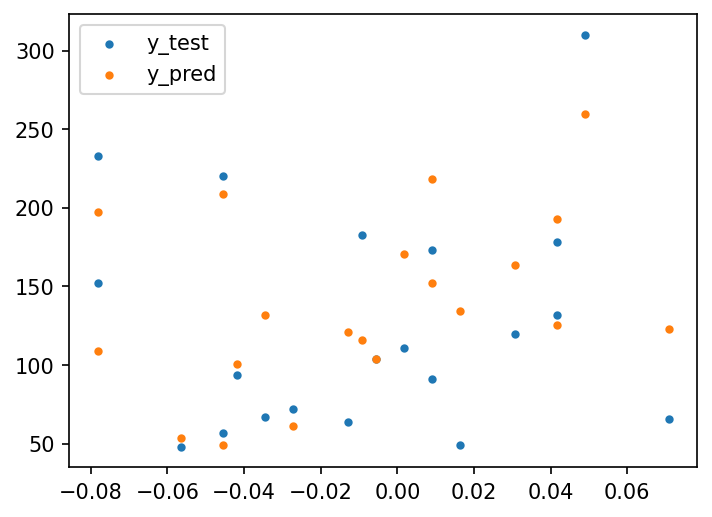

In [54]:
# Make it possible to show plots in the notebooks.
%matplotlib inline
import numpy as np
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt



def fit_linear_with_regularization(X, y, alpha):
  """
  This function computes the optimal parameter vector for linear regression 
  regularization of a dataset D defined by the arrays X and y

  @param X :  A numpy array of size n x p where each row represents a 
              p-dimensional data point describing numerical features of a patient
  @param y :  A numpy array of size n x 1 where each element describes the 
              numerical diabetes progression
  @return w:  A numpy array of size p x 1 representing the optimal parameter 
              vector for the linear regression of the data with a regularization 
              term as derived in tasks 1 through 3
  """

  n, p = np.shape(X)  # Get number of data points and number of features
  w = [None]*p        # Preallocate array of paramters
  I = np.eye(p)       # Define identity matrix of dimension (p * p)

  # Compute parameter vector w* according to the expression in task 3
  w = np.matmul(np.linalg.inv(alpha*I+np.matmul(X.T,X)),np.matmul(X.T,y))
  #w = np.linalg.inv(alpha*I + X.T@X)@(X.T@y) # Equivalently, using Python's matrix multiplication operator
  return w 

def predict(X_test, w):
  """
  This function computes predicted outcomes of test data X_test based on the 
  parameters w obtained from linear regression with regularization on a dataset 
  defined by the arrays X and y

  @param X_test : A numpy array of size n x p where each row represents a 
                  p-dimensional test data point
  @return w     : A numpy array of size p x 1 representing the optimal parameter 
                  vector for linear regression with a regularization 
                  term as derived in tasks 1 through 3
  @return y_pred: A numpy array of size n x 1 describing the predicted 
                  outcomes of the test data X_test
  """

  # Calculate the predictions of the linear regression on the test data
  y_pred = np.matmul(X_test, w) # Using numpy matrix multiplication
  return y_pred


def plot_prediction(X_test, y_test, y_pred):
  """
  This function takes test data given by X_test and y_test, as well as the 
  predictions y_pred made using linear regression with regularization, and does
  the following:
  1) Makes a scatter plot of the first feature of the test data
     and the true outcomes of the test data (y_test)
  2) In the same figure, plots the predicted outcomes (y_pred) against 
     the first feature of the test data
  3) Calculated the mean squared error of the predictions with respect to the
     test data
  Note that the "first" feature of the dataset is called by using X_test[:,1] 
  due to the constant feature being appended as the zero-th column in X_test

  @param X_test : A numpy array of size n x p where each row represents a 
                  p-dimensional test data point
  @param y_test : A numpy array of size n x 1 representing the true outcomes 
                  in the test dataset
  @param y_pred : A numpy array of size n x 1 describing the predicted 
                  outcomes of the test data X_test based on linear regression
                  with regularization of the training data
  @return mean_squared_error: A real number given by the mean squared error of 
                              the prediction with respect to the test data
  """
  
  # Define figure and axes
  plt.figure(num=None, figsize=(5.4, 4.0), dpi=150)
  ax = plt.axes()
  # Scatter plot the first feature of X_test (x-axis) and y_test (y-axis)
  plt.scatter(X_test[:,1], y_test, label='y_test', marker='.')                   
  # Plot y_pred using the first feature of X_test as x-axis
  plt.scatter(X_test[:,1], y_pred, label='y_pred', marker='.')                   
  ax.legend() # Add legend
  
  # compute the difference between each prediction and test point
  diff = y_test - y_pred
  # compute the mean squared error from definition using vector multiplication.
  mean_squared_error = (diff.T @ diff) / len(diff)
  return mean_squared_error


# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)
# Add constant feature (column of ones) to the data
X = np.hstack([ np.ones([X.shape[0], 1]), X])                                   


# Split the dataset into training and test set
num_test_elements = 20

X_train = X[:-num_test_elements]
X_test = X[-num_test_elements:]

y_train = y[:-num_test_elements]
y_test = y[-num_test_elements:]


# Set alpha
alpha = 0.01

# Train using linear regression with regularization and find optimal model
w = fit_linear_with_regularization(X_train, y_train, alpha)


# Make predictions using the testing set X_test
y_pred = predict(X_test, w)



# Plots and mean squared error
error = plot_prediction(X_test, y_test, y_pred)



print('Mean Squared error is ', error)


# Show the plot
plt.show();




## **Bonus task**
We define a function that standardizes the data (moves mean to 0 and scales standard deviation to 1) for each feature. 

This is done by calculating a vector consiting of the mean of each feature $j$

$$\mu_j = \frac{\sum_{i=1}^n x_{i,j}}{n}$$

and a vector consisting of the standard deviation of every feature $j$

$$\sigma_j = \sqrt{\frac{\sum_{i=1}^n (x_{i,j}-\mu_j)^2}{n}}$$

The data is then scaled according to

$$\hat{x} = \mathbf{X} - \mu_{j}$$

where $\hat{x}_ {i,j}$ is the standardized value of feature $j$ in p-dimensional data entry $i$. This then results in a standardized input data matrix $\hat{\mathbf{X}}$ of dimension $(n,p)$.

We then create a function that calculates the mean squared error (identically to $\texttt{plot_prediction}$ in task 6 but without the plotting) for a given $\alpha$ and use $\texttt{scipy.optimize.minimize}$ to find the $\alpha$ which minimizes the mean squared error. 

alpha which minimizes the MSE: 35.9803
Mean squared error for alpha = 35.9803 is 1865.1798


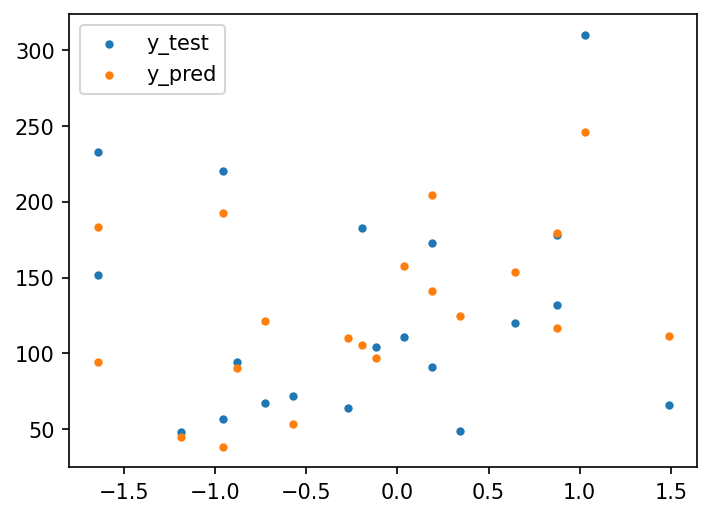

In [55]:
def standardize_data(X):
  """
  This function standardizes input data defined by an array X by translating
  the mean of every feature to 0 and scaling the standard deviation of every
  feature to be 1. The standardized data is defined as a new array of the same
  dimensions as X.

  @param X :  A numpy array of size n x p where each row represents a 
              p-dimensional data point
  @return X_std:  A numpy array of size n x p consisting of the data in X with 
                  the mean of every feature is moved to 0 and where the standard
                  deviation of every feature is scaled to 1
  """

  n, p = np.shape(X) # Get number of test data points and number of features

  # Calculate mean of each feature:
  mu = np.zeros(p)   # Preallocate array of means of each feature
  mu = sum(X[:,:])/n # Sum over columns in X and divide by number of entries

  # Calculate standard deviation of each feature:
  sigma = np.zeros(p)  # Preallocate array of standard deviations
  sigma = np.sqrt( sum((X[:,:] - mu[:])**2) / n ) # Sum squared deviations from mean for each feature, divide by number of entries and take square root

  # Standardize the data (move mean to 0, standard deviation to 1)
  X_std = np.array(X.shape)       # Preallocate matrix dimensions
  X_std = (X[:,:] - mu[:])/sigma  # Translate by mean and scale by standard deviation
  return X_std


def get_MSE(alpha, X_train, y_train, X_test, y_test):
  """
  This function takes a given value for the regularization parameter alpha and:
  1) performs linear regression on training data defined by X_train and y_train 
  2) makes predictions for test input data X_test using the parameter vector 
     obtained from training
  3) calculates the mean squared error of the predictions with respect to the
     true test data outcomes y_test

  @param alpha: A real, strictly positive number describing the coefficient of 
                the regularization term in the linear regression.
  @param X_train: A numpy array of size n x p where each row represents a 
                  p-dimensional data point in the training input data
  @param y_train: A numpy array of size n x 1 representing the true outcomes 
                  in the training dataset
  @param X_test : A numpy array of size n x p where each row represents a 
                  p-dimensional data point in the test input data
  @param y_test : A numpy array of size n x 1 representing the true outcomes 
                  in the test dataset
  @return mean_squared_error: A real number given by the mean squared error of 
                              the prediction with respect to the test data
  """

  # Train using linear regression with regularization and find optimal model
  w = fit_linear_with_regularization(X_train, y_train, alpha)

  # Make predictions using the testing set X_test
  y_pred = predict(X_test, w)

  # Compute the difference between each prediction and test point
  diff = y_test - y_pred
  # Compute the mean squared error from definition using vector multiplication.
  mean_squared_error = (diff.T @ diff) / len(diff)
  return mean_squared_error

# Repeat plotting the data and calculating the MSE after standardizing input data X

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)
# Standardize the data (move mean to 0, standard deviation to 1)
X = standardize_data(X)                                                         # Comment this line and run again to see results without standardization
# Add constant feature (column of ones) to the data
X = np.hstack([ np.ones([X.shape[0], 1]), X])                                   


# Split the dataset into training and test set
num_test_elements = 20

X_train = X[:-num_test_elements]
X_test = X[-num_test_elements:]

y_train = y[:-num_test_elements]
y_test = y[-num_test_elements:]

# Import minimization function
from scipy.optimize import minimize
# Make initial guess for alpha
alpha_init = 0.01
# Minimize the mean squared error with respect to alpha using the 
# standardized training and test data
MSE = minimize(get_MSE, x0 = alpha_init, args = (X_train, y_train, X_test, y_test))
alpha_min = MSE.x # Return the optimal value of alpha
MSE_min = MSE.fun # Return the mean squared error for the optimal alpha
print(f'alpha which minimizes the MSE: {float(alpha_min):.4f}')

# Generate plot and get MSE for the optimized alpha
# Train using linear regression with regularization and find optimal model
w = fit_linear_with_regularization(X_train, y_train, alpha_min)

# Make predictions using the testing set X_test
y_pred = predict(X_test, w)

# Plots and mean squared error
error = plot_prediction(X_test, y_test, y_pred)

print(f'Mean squared error for alpha = {float(alpha_min):.4f} is {error:.4f}')

# Show the plot
plt.show();

Without standardizing the data, a value of $\alpha = 0.0041$ was found to minimize the MSE, yielding $MSE = 2001.84$, which is not a significant improvement from the results in task 6.

After standardizing the data, as described above, $\alpha \approx 35.98$ was found to minimize the mean squared error, resulting in $MSE \approx 1865$. This is somewhat lower than the result from task 6 ($MSE \approx2004$), suggesting that this model is an improvement in comparison to the results in task 6.


# Bayesian Linear Regression   4pt

Proud of finishing the task using a linear model with regularization, you show your results to a representative of the Swedish Public Health Agency. You barely finish explaining your solution when the face of the representative turns red and you could distinctly hear: "Bayesian is the only way: How come didn't you use any probabilities?". 

You quickly head back to your desk and now assume a Gaussian prior on the solution $\mathbf{w}$, that is $p(\mathbf{w}) = \mathcal{N}(\mathbf{0}, \lambda^{-1} \mathbf{I})$ where $\lambda \in \mathbb{R}$ is a constant real number, $I$ is the $p \times p$ identity matrix and $\mathcal{N}(\mathbf{0}, \lambda^{-1} \mathbf{I})$ is used to mean the multivariate gaussian distribution with mean $\mathbf{0} \in \mathbb{R}^p$ , a vector of zeros of dimension $p$ and covariance matrix $\lambda^{-1} \mathbf{I}$ . Then, you use the following likelihood:

$p(\mathbf{y} | \mathbf{X}, \mathbf{w}) = \prod_{i=1}^n \mathcal{N}(\mathbf{w}^T \mathbf{x}_i, \gamma^{-1})$ where here $\gamma \in \mathbb{R}$ is a constant real number and $\mathcal{N}(\mathbf{w}^T \mathbf{x}_i, \gamma^{-1})$ is the gaussian distribution with mean  $\mathbf{w}^T \mathbf{x}_i$ and variance $\gamma^{-1}$.


7- **2pt** Derive and express in vector/matrix form as a function of $\mathbf{X}, \mathbf{y}, \mathbf{w}$ the log posterior $\ln p(\mathbf{w} | \mathbf{y}, \mathbf{X})$. Show all the derivations. You can ignore normalizing constants.
 


8-  **2pt** Show that maximizing the posterior in 7- is  similar to minimizing the function $\mathcal{L}(\mathbf{w})$ seen in the previous section. Show your derivations. (Note: You should show this without computing the maximum of the posterior. Instead, you should express the log posterior in term of $\mathcal{L}(\mathbf{w})$, ignoring constants if necessary. Then find the $\alpha$ of $\mathcal{L}(\mathbf{w})$ in term of $\lambda$ and $\gamma$).



**7.** By Bayes' rule, we have
\begin{align}
p(\mathbf{w|y,X}) &= \frac{p(\mathbf{y|w,X})p(\mathbf{w})}{p(\mathbf{y|X})} \\
 &= \frac{p(\mathbf{y|w,X})p(\mathbf{w})}{\int p(\mathbf{y|w,X})p(\mathbf{w})\mathrm{d}\mathbf{w}}
\end{align}
Ignoring normalizing constants, we have
\begin{align}
p(\mathbf{w|y,X}) &\propto p(\mathbf{y|w,X})p(\mathbf{w}) \\
 &= \mathcal{N}(\mathbf{Xw}, \gamma^{-1}\mathbf{I}_{n \times n}) \cdot \mathcal{N}(\mathbf{0}, \lambda^{-1}\mathbf{I}_{p \times p}) \\
 &= \frac{1}{(2\pi)^{n/2}|\gamma^{-1}\mathbf{I}_{n \times n}|^{1/2}}exp(-\frac{1}{2}(\mathbf{y - Xw})^T(\gamma^{-1}\mathbf{I}_{n \times n})^{-1}(\mathbf{y - Xw})) \\
 &\times \frac{1}{(2\pi)^{p/2}|\lambda^{-1}\mathbf{I}_{p \times p}|^{1/2}}exp(-\frac{1}{2}\mathbf{w}^T(\lambda^{-1}\mathbf{I}_{p \times p})^{-1}\mathbf{w})
\end{align}
Taking logarithm, and ignoring constants, we have
\begin{align}
log(p(\mathbf{w|y,X})) &\propto -\frac{1}{2}(\mathbf{y - Xw})^T(\gamma^{-1}\mathbf{I}_{n \times n})^{-1}(\mathbf{y - Xw})-\frac{1}{2}\mathbf{w}^T(\lambda^{-1}\mathbf{I}_{p \times p})^{-1}\mathbf{w} \\
 &= -\frac{\gamma}{2}(\mathbf{y - Xw})^T(\mathbf{y - Xw})-\frac{\lambda}{2}\mathbf{w}^T\mathbf{w}
\end{align}

**8.** We have known that
$$\mathcal{L}(\mathbf{w}) = (\mathbf{y} - \mathbf{Xw})^T(\mathbf{y} - \mathbf{Xw}) + \alpha\cdot\mathbf{w}^T\mathbf{w}$$
, and from 7 we know
\begin{align}
log(p(\mathbf{w|y,X})) &\propto-\frac{\gamma}{2}(\mathbf{y - Xw})^T(\mathbf{y - Xw})-\frac{\lambda}{2}\mathbf{w}^T\mathbf{w} \\
 &= -\frac{\gamma}{2}((\mathbf{y - Xw})^T(\mathbf{y - Xw}) + \frac{\lambda}{\gamma}\mathbf{w}^T\mathbf{w}) \\
 &= -\frac{\gamma}{2}\mathcal{L}(\mathbf{w}),\, \alpha = \frac{\lambda}{\gamma}
\end{align}
From the above formula, let $\lambda, \gamma \gt 0$, we can see that minimizing the function $\mathcal{L}(\mathbf{w})$ is actually maximizing the posterior in 7.